In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

# from Assignment1 import pixel_probs

TRAINING DATASET

In [7]:
train_images_df = pd.read_csv('train_images.csv')
x_train = train_images_df.values
train_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0


In [6]:
train_labels_df = pd.read_csv('train_labels.csv')
y_train = train_labels_df.values.ravel()
train_labels_df.head()


,9
0,0
1,0
2,3
3,0
4,2


In [8]:
test_images_df = pd.read_csv('test_images.csv')
x_test = test_images_df.values
test_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516
0,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [9]:
test_labels_df = pd.read_csv('test_labels.csv')
y_test = test_labels_df.values.ravel()
test_labels_df.head()

,9
0,2
1,1
2,1
3,6
4,1


In [10]:
# Printing out the unique classes in our label files. Should match with below
print("Class distribution in training set: ", np.unique(y_train))
# Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]


# Binarization – Select a threshold, ‘del’, to be 127: 

All pixel values less than ‘del’ are given value 0 
All pixel values greater than or equal to ‘del’ are given value 1 


In [11]:
# Threshold, 'del', to be 127
def binarize_images(images, threshold=127):
    # convert grayscale images 0-255 into binary, either 1 or 0
    return (images >= threshold).astype(int)

In [12]:
# Default binarization with threshold 127
x_train_bin = binarize_images(x_train)
print(f'Training Data Binarized: {x_train_bin}')
# print(f'First entry in binarized training data: {x_train_bin[1]}')
x_test_bin = binarize_images(x_test)
print(f'Testing Data Binarized: {x_test_bin}')

Training Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
trouser_class = 1
pullover_class = 2

# Filter to only have trousers and pullovers
filtering_indices_train = np.where((y_train == trouser_class) | (y_train == pullover_class))
filtering_indices_test = np.where((y_test == trouser_class) | (y_test == pullover_class))

In [15]:
# Applying filter to images and labels data
x_train_filtered = x_train_bin[filtering_indices_train]
y_train_filtered = y_train[filtering_indices_train]

x_test_filtered = x_test_bin[filtering_indices_test]
y_test_filtered = y_test[filtering_indices_test]

In [17]:
# Printing to see what our data looks like now
print(f'Number of training samples (Trousers and Pullovers only): {len(x_train_filtered)}')
print(f'Number of testing samples (Trousers and Pullovers only): {len(x_test_filtered)}')
print(f'Classes in filtered training set: {np.unique(y_train_filtered)}')
print(f'Line above means that only Trousers(1) and Pullovers(2) are in the dataset')

Number of training samples (Trousers and Pullovers only): 12000
Number of testing samples (Trousers and Pullovers only): 2000
Classes in filtered training set: [1 2]
Line above means that only Trousers(1) and Pullovers(2) are in the dataset


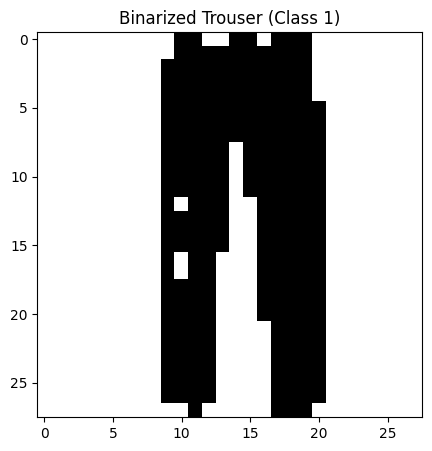

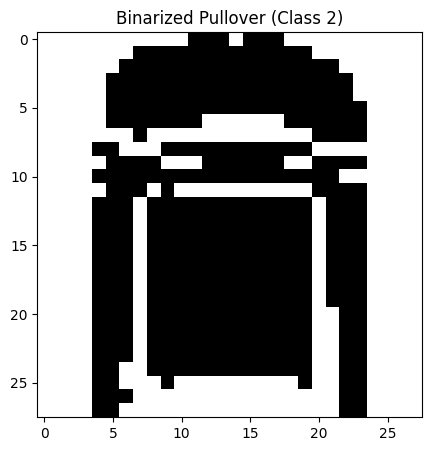

In [18]:
# Let's visualize one example of each class after filtering and binarization
trouser_idx = np.where(y_train_filtered == trouser_class)[0][0]
pullover_idx = np.where(y_train_filtered == pullover_class)[0][0]

def display_image(pixels, title):
    # Reshape the 784 pixels to 28x28 image
    img = pixels.reshape(28, 28)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='binary')
    plt.title(title)
    plt.show()

display_image(x_train_filtered[trouser_idx], f'Binarized Trouser (Class {trouser_class})')
display_image(x_train_filtered[pullover_idx], f'Binarized Pullover (Class {pullover_class})')

# NAIVE BAYES CLASSIFICATION 



In [ ]:
# Bayes' Theorem
# P(A|B) = P(B | A) * P(A) / P(B)
# P(A|B) = Probability the item is a trouser, given the pixel data
# P(A) = probability of picking a trouser without looking
# P(B) = probability of seeing that pixel pattern in any image

# Our dataset --> 50% of images are Trousers and 50% are Pullovers
# P(Trouser) = 0.5, P(Pullover) = 0.5 ----> so P(A) is 0.5

# Need to look at how often each pixel is black or white in our training data
# will have to calculate probability of 1st pixel being black indicating a trouser
# then calculate all the other pixels being black == trouser?

In [19]:
# Prior Probabilities
n_samples = len(x_train_filtered)
classes = np.unique(y_train_filtered)
n_classes = len(classes)
print(f'{n_samples} training samples, {n_classes} classes')

12000 training samples, 2 classes


In [22]:
# initializing storage for priors and likelihoods
class_priors = {}
pixel_priors = {}

# Loop through each class manually to get the priors and probabilities 
for cLass in [1, 2]:
    print(f'Processing Class; {cLass}')
    
    # getting all images of the current class
    x_cLass = x_train_filtered[y_train_filtered == cLass]
    total_c_samples = len(x_cLass)
    print(f'Total training samples: {total_c_samples}')
    
    # calculate prior probability P(A)
    class_priors[cLass] = total_c_samples / len(x_train_filtered)
    print(f'Prior P(Class {cLass}): {class_priors[cLass]:}')
    ## if this is 50% then the dataset is evenly split between trousers and pullovers
    
    # calculate likelihood probability P(A | B)
    
    pixel_one_counts = np.sum(x_cLass, axis=0) + 1    # 1 for laplace smoothing
    
    # calculate probability of pixel being 1 given class
    probPixIs1 = pixel_one_counts / (total_c_samples + 2) # 2 for laplace smoothing
    probPixIs0 = 1 - probPixIs1
    
    print(f'These are the probabilities that a pixel value of 1 indicate class {cLass}: {probPixIs1}')
    print(f'These are the probabilities that a pixel value of 0 indicate class {cLass}: {probPixIs0}')

print(f'Class Priors: {class_priors}')

Processing Class; 1
Total training samples: 6000
Prior P(Class 1): 0.5
These are the probabilities that a pixel value of 1 indicate class 1: [1.66611130e-04 1.66611130e-04 1.66611130e-04 1.66611130e-04
 4.99833389e-04 9.99666778e-04 3.66544485e-03 1.08297234e-02
 2.69910030e-02 1.03132289e-01 4.42685771e-01 5.63312229e-01
 4.87670776e-01 4.64345218e-01 4.08863712e-01 4.57347551e-01
 4.54348550e-01 4.71009663e-01 3.60879707e-01 7.78073975e-02
 1.64945018e-02 6.66444518e-03 1.49950017e-03 1.66611130e-04
 1.66611130e-04 1.66611130e-04 1.66611130e-04 1.66611130e-04
 1.66611130e-04 1.66611130e-04 1.66611130e-04 3.33222259e-04
 4.99833389e-04 2.83238920e-03 9.33022326e-03 1.99933356e-02
 5.98133955e-02 2.51916028e-01 8.13728757e-01 9.31022992e-01
 9.30856381e-01 9.27690770e-01 9.23025658e-01 9.01032989e-01
 9.02865711e-01 8.59713429e-01 6.82439187e-01 1.73275575e-01
 3.86537821e-02 1.54948351e-02 4.66511163e-03 8.33055648e-04
 1.66611130e-04 1.66611130e-04 1.66611130e-04 1.66611130e-04
 1.66

In [24]:
x_trouser = x_train_filtered[y_train_filtered == trouser_class]
x_pullover = x_train_filtered[y_train_filtered == pullover_class]

print(f'Samples for trousers: {x_trouser.shape[0]}')
print(f'Samples for Pullovers: {x_pullover.shape[0]}')

# laplace smoothing factors
alpha = 1

P_x_given_trouser = (np.sum(x_trouser, axis=0) + alpha) / (x_trouser.shape[0] + 2)

Samples for trousers: 6000
Samples for Pullovers: 6000
